# Analysis of App Store¶

### Content

+ Introduction: App Store

+ Data description

+ Research questions

+ Data preparation

+ EDA and Visualisation


## 1. Introduction: App Store



The App Store is a digital distribution platform, developed and supported by Apple Inc., for mobile applications on its iOS & iPadOS operating systems. The store allows users to browse and download apps developed with Apple's iOS software development kit.

The App Store was created on July 10, 2008, with an available 500 applications. The number of apps peaked at about 2.2 million in 2017, but decreased slightly over the next few years as Apple began the process of removing older apps that do not work properly or don't meet current app guidelines. 

As we know, App Store has good paid applications as well as free apps. Many of them are helpful and people download in spite of they are not free.

This dataset contains more than 7000 Apple iOS mobile application details. The data was extracted from the iTunes Search API at the Apple Inc website in 2017. But I took ready dataset from the kaggle to do my analysis.

Source(https://en.wikipedia.org/wiki/App_Store_(iOS/iPadOS))

## 2. Data description

Based on description of App Store above, we see that in 2017 was a peak of amount of applications in the store. After that, by analyzing them, Apple started to filter and cleaning the App Store. In the dataset we will cover small part of them and analyze.

This analysis will be built on data of 2017. Below is data that we will use for our analysis:

- id - position in the list
- track_name - name of the application
- size_bytes - size of the application
- price - price of the application
- user_rating - average user rating value 
- prime_genre - genre of the application
- lang.num - number of supported languages


## 3. Research questions

For this project, data analysis and visualization contains 6 parts:

1. Analyze price of applications.
2. Analyze size to see heavy applications.
3. Analyze genre to group applications.
4. Analyze rating to illustrate popular applications.
5. Analyze lang.num to show applications that supports many languages.

## 4. Data preparation

In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
#read the dataset as a dataframe
as_file = pd.read_csv('AppleStore.csv')

In [3]:
#return the dataframe
as_file.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [4]:
as_file.shape

(7197, 17)

We see that the dataset consists of 7197 rows and 17 columns.

In [5]:
as_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   currency          7197 non-null   object 
 5   price             7197 non-null   float64
 6   rating_count_tot  7197 non-null   int64  
 7   rating_count_ver  7197 non-null   int64  
 8   user_rating       7197 non-null   float64
 9   user_rating_ver   7197 non-null   float64
 10  ver               7197 non-null   object 
 11  cont_rating       7197 non-null   object 
 12  prime_genre       7197 non-null   object 
 13  sup_devices.num   7197 non-null   int64  
 14  ipadSc_urls.num   7197 non-null   int64  
 15  lang.num          7197 non-null   int64  
 16  vpp_lic           7197 non-null   int64  


We see that the dataset has no missing values.

In [6]:
as_file.isnull().sum()

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

We have checked up that there is exactly no missing values.

In [7]:
#sum of duplicated data
as_file.duplicated().sum()

0

We can see that the dataset does not have duplicated data.

In [8]:
#drop extra columns of the dataframe
as_file.drop(['Unnamed: 0', 'currency', 'rating_count_tot' , 'rating_count_ver' , 'user_rating_ver', 'ver', 'cont_rating', 'sup_devices.num', 'ipadSc_urls.num', 'vpp_lic'], axis='columns', inplace=True)

Now we have dropped some useless columns such as, 'Unnamed: 0', 'currency', 'rating_count_tot', 'rating_count_ver', 'user_rating_ver', 'ver', 'cont_rating', 'sup_devices.num', 'ipadSc_urls.num', 'vpp_lic'.

In [9]:
#return clear dataframe

as_file.head()

,id,track_name,size_bytes,price,user_rating,prime_genre,lang.num
0,281656475,PAC-MAN Premium,100788224,3.99,4.0,Games,10
1,281796108,Evernote - stay organized,158578688,0.00,4.0,Productivity,23
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,3.5,Weather,3
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,4.0,Shopping,9
4,282935706,Bible,92774400,0.00,4.5,Reference,45


We can see that there are left only 7 columns with useful data.

In [10]:
as_file.shape

(7197, 7)

And the dataset consists of 7197 rows and 7 columns as well.

In [11]:
as_file2 = as_file.rename(columns = {"track_name": "name",
                                    "size_bytes": "size",
                                    "user_rating": "rating",
                                    "prime_genre": "genre",
                                    "lang.num": "lang_num"}) #rename some columns

as_file2.head()

,id,name,size,price,rating,genre,lang_num
0,281656475,PAC-MAN Premium,100788224,3.99,4.0,Games,10
1,281796108,Evernote - stay organized,158578688,0.00,4.0,Productivity,23
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,3.5,Weather,3
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,4.0,Shopping,9
4,282935706,Bible,92774400,0.00,4.5,Reference,45


Now we have changed names of some columns to more understanding.

In [12]:
as_file2["price_category"] = "" #create empty column

as_file2.head()

,id,name,size,price,rating,genre,lang_num,price_category
0,281656475,PAC-MAN Premium,100788224,3.99,4.0,Games,10,
1,281796108,Evernote - stay organized,158578688,0.00,4.0,Productivity,23,
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,3.5,Weather,3,
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,4.0,Shopping,9,
4,282935706,Bible,92774400,0.00,4.5,Reference,45,


We have added new column "price_category".

In [50]:
for p in range(len(as_file2["price"])): #run through the price
    
    if (as_file2["price"][p] == 0.00): #comparing the value of price
        as_file2.loc[[p],"price_category"] = 'free'; #giving the new value for price_category        
    elif (0.00 < as_file2["price"][p] and as_file2["price"][p] <= 10.00):
        as_file2.loc[[p],"price_category"] = 'cheap';
    elif (10.00 < as_file2["price"][p] and as_file2["price"][p] <= 25.00):
        as_file2.loc[[p],"price_category"] = 'medium';
    else:
        as_file2.loc[[p],"price_category"] = 'expensive';
        
as_file2.head()

,id,name,size,price,rating,genre,lang_num,price_category
0,281656475,PAC-MAN Premium,100788224,3.99,4.0,Games,10,cheap
1,281796108,Evernote - stay organized,158578688,0.00,4.0,Productivity,23,free
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,3.5,Weather,3,free
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,4.0,Shopping,9,free
4,282935706,Bible,92774400,0.00,4.5,Reference,45,free


We have inserted data into "price_category" column by dividing prices to 4 categories, such as, free, cheap, medium and expensive.

In [14]:
as_file2.shape

(7197, 8)

The shape was changed from 7 columns to 8 columns as well.

In [15]:
as_file2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              7197 non-null   int64  
 1   name            7197 non-null   object 
 2   size            7197 non-null   int64  
 3   price           7197 non-null   float64
 4   rating          7197 non-null   float64
 5   genre           7197 non-null   object 
 6   lang_num        7197 non-null   int64  
 7   price_category  7197 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 449.9+ KB


We see that the type of our new column "price_category" is object.

## 5. EDA and Visualisation

In this part we will answer to the research questions by visualization.

### 5.1 Analyze price of applications.

In [16]:
#apply the theme
sns.set_theme(style="whitegrid")

In [17]:
as_file2["price_category"].value_counts()

free         4056
cheap        3044
medium         76
expensive      21
Name: price_category, dtype: int64

Now we see how many applications are in each category.

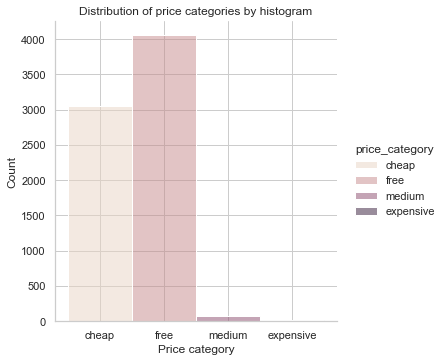

In [18]:
ax = sns.displot(data=as_file2,
            x="price_category",
            hue="price_category",
            binwidth=4,
            palette="ch:.19"
           ).set(title='Distribution of price categories by histogram')
ax.set_axis_labels("Price category", "Count");

In this histogram we see that most of the applications are free and only few of them are expensive.

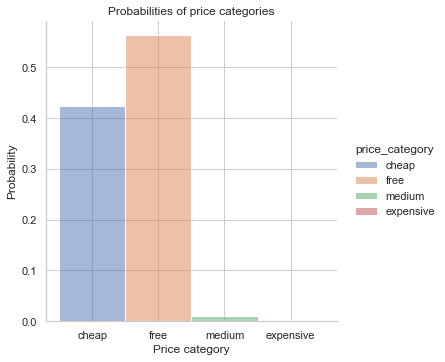

In [19]:
ax = sns.displot(data=as_file2, 
            x="price_category", 
            hue="price_category", 
            stat="probability"
           ).set(title='Probabilities of price categories')
ax.set_axis_labels("Price category", "Probability");

In [21]:
c1 = as_file2["price"].where(as_file2["price_category"]=='free') #finding price which category is free
c2 = as_file2["price"].where(as_file2["price_category"]=='cheap') #finding price which category is cheap                                              
c3 = as_file2["price"].where(as_file2["price_category"]=='medium') #finding price which category is medium                                               
c4 = as_file2["price"].where(as_file2["price_category"]=='expensive') #finding price which category is expensive

I have divided prices by categories.

In [22]:
print(c1.count()/as_file2["price"].count()*100) #calculating the percentage of free apps

56.35681533972489


Wee see that 56.36% of all applications are free.

In [23]:
print(c2.count()/as_file2["price"].count()*100) #calculating the percentage of cheap apps

42.29540086147006


Wee see that 42.29% of all applications are cheap.

In [24]:
print(c3.count()/as_file2["price"].count()*100) #calculating the percentage of medium apps

1.0559955537029317


Wee see that 1.06% of all applications are medium.

In [25]:
print(c4.count()/as_file2["price"].count()*100) #calculating the percentage of expensive apps

0.29178824510212586


Wee see that 0.29% of all applications are expensive.

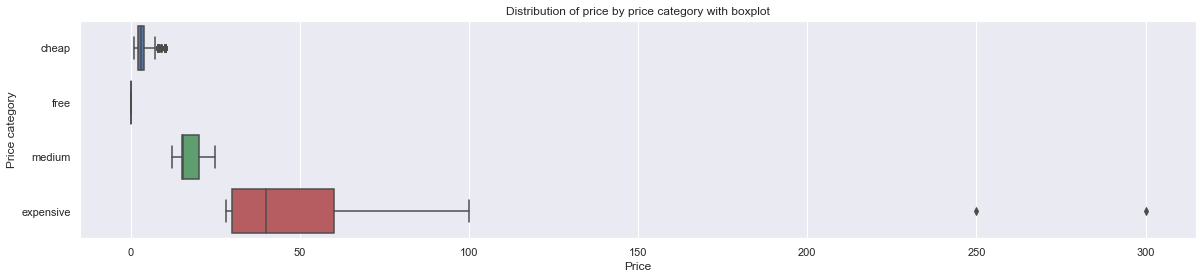

In [49]:
sns.set(rc={'figure.figsize':(20,4)}) #giving the size for figure

ax = sns.boxplot(data=as_file2, #create the boxplot
            x="price",
            y="price_category"
           ).set(title='Distribution of price by price category with boxplot', xlabel="Price", ylabel="Price category")

In the boxplot we can see that category "cheap" has some outliers around 6-12, "expensive" has 2 outliers on 249.99 and 299.99, and it skewed to right side. "free" does not has an outlier, wiskers, mean and mode, they are equal to 0. 

## 5.2 Analyze size to see heavy applications.

We will analyze size of applications

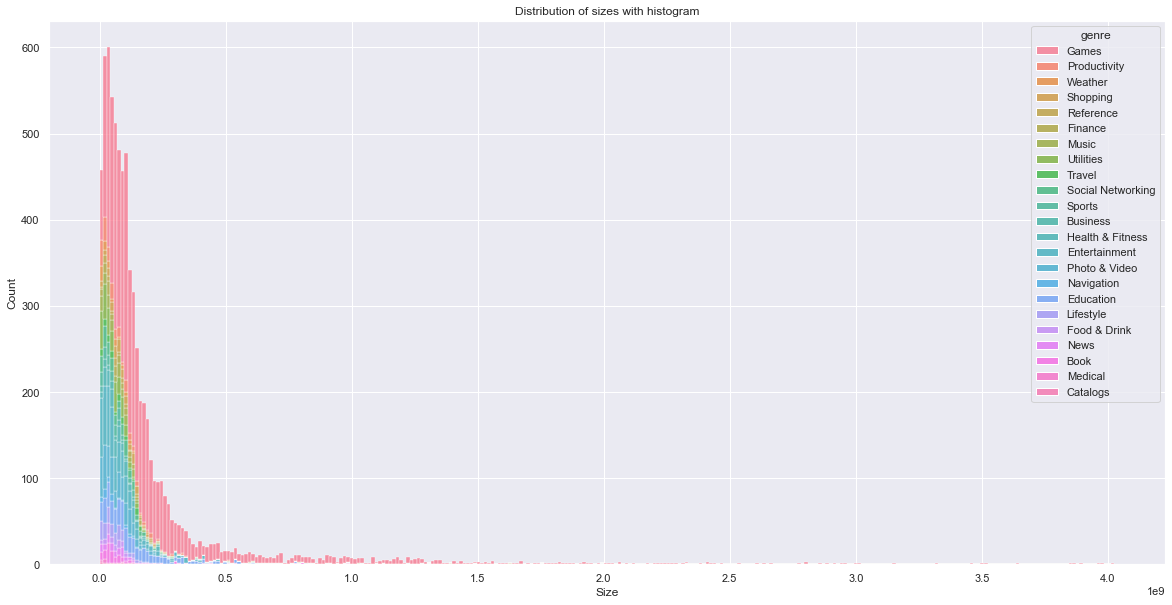

In [48]:
sns.set(rc={'figure.figsize':(20,10)}) #giving the size for figure

ax = sns.histplot(data=as_file2, #create the histogram
            x="size", 
            multiple="stack",
            hue="genre"
           ).set(title='Distribution of sizes with histogram', xlabel="Size", ylabel="Count")

In that case we can understand that the size of many applications is around 0 and 0.5 * 10^9 Bytes. The  quantity of heavy applications is almost 10-20, while the amount of light applications is bitty over 600.

In [34]:
max(as_file2["size"])

4025969664

In [35]:
min(as_file2["size"])

589824

We found out the maximum and minimum sizes

In [36]:
s1 = as_file2["size"].where(as_file2["size"]<=500000000) #finding the size which is less than 500000000
s1.count()

6596

In [37]:
s2 = as_file2["size"].where((500000000<as_file2["size"]) & (as_file2["size"]<=2500000000)) #finding the size which is between 500000000 and 2500000000
s2.count()

568

In [38]:
s3 = as_file2["size"].where(2500000000<as_file2["size"]) #finding the size which is bigger than 2500000000
s3.count()

33

We have found the total number of definite genres by sizes.

In [39]:
h = as_file2.sort_values(by='size', ascending=False).head(33) #creating a new dataframe with 33 observations of applications with big size
h

,id,name,size,price,rating,genre,lang_num,price_category
5989,1106831630,ROME: Total War,4025969664,9.99,4.5,Games,6,cheap
6772,1146713881,パチスロ ガールズ＆パンツァー,3975609344,9.99,0.0,Games,1,cheap
6677,1141253112,戦国乙女2～深淵に輝く気高き将星～,3968637952,7.99,0.0,Games,1,cheap
4673,1055962232,デビルサバイバー２ 最後の７日間,3956326400,7.99,0.0,Games,1,cheap
6017,1108475553,Jade Empire™: Special Edition,3896109056,9.99,4.5,Games,10,cheap
4387,1041260001,FINAL FANTASY Ⅸ,3860406272,20.99,4.5,Games,5,medium
5648,1091640857,"That Dragon, Cancer",3856588800,4.99,4.5,Games,1,cheap
2135,687888390,République,3646993408,1.99,4.5,Games,1,cheap
3604,978524071,Grim Fandango Remastered,3521220608,4.99,4.0,Games,6,cheap
2688,881270303,XCOM®: Enemy Within,3508826112,9.99,4.0,Games,9,cheap


This is a database for 33 heavy applications in descending order.

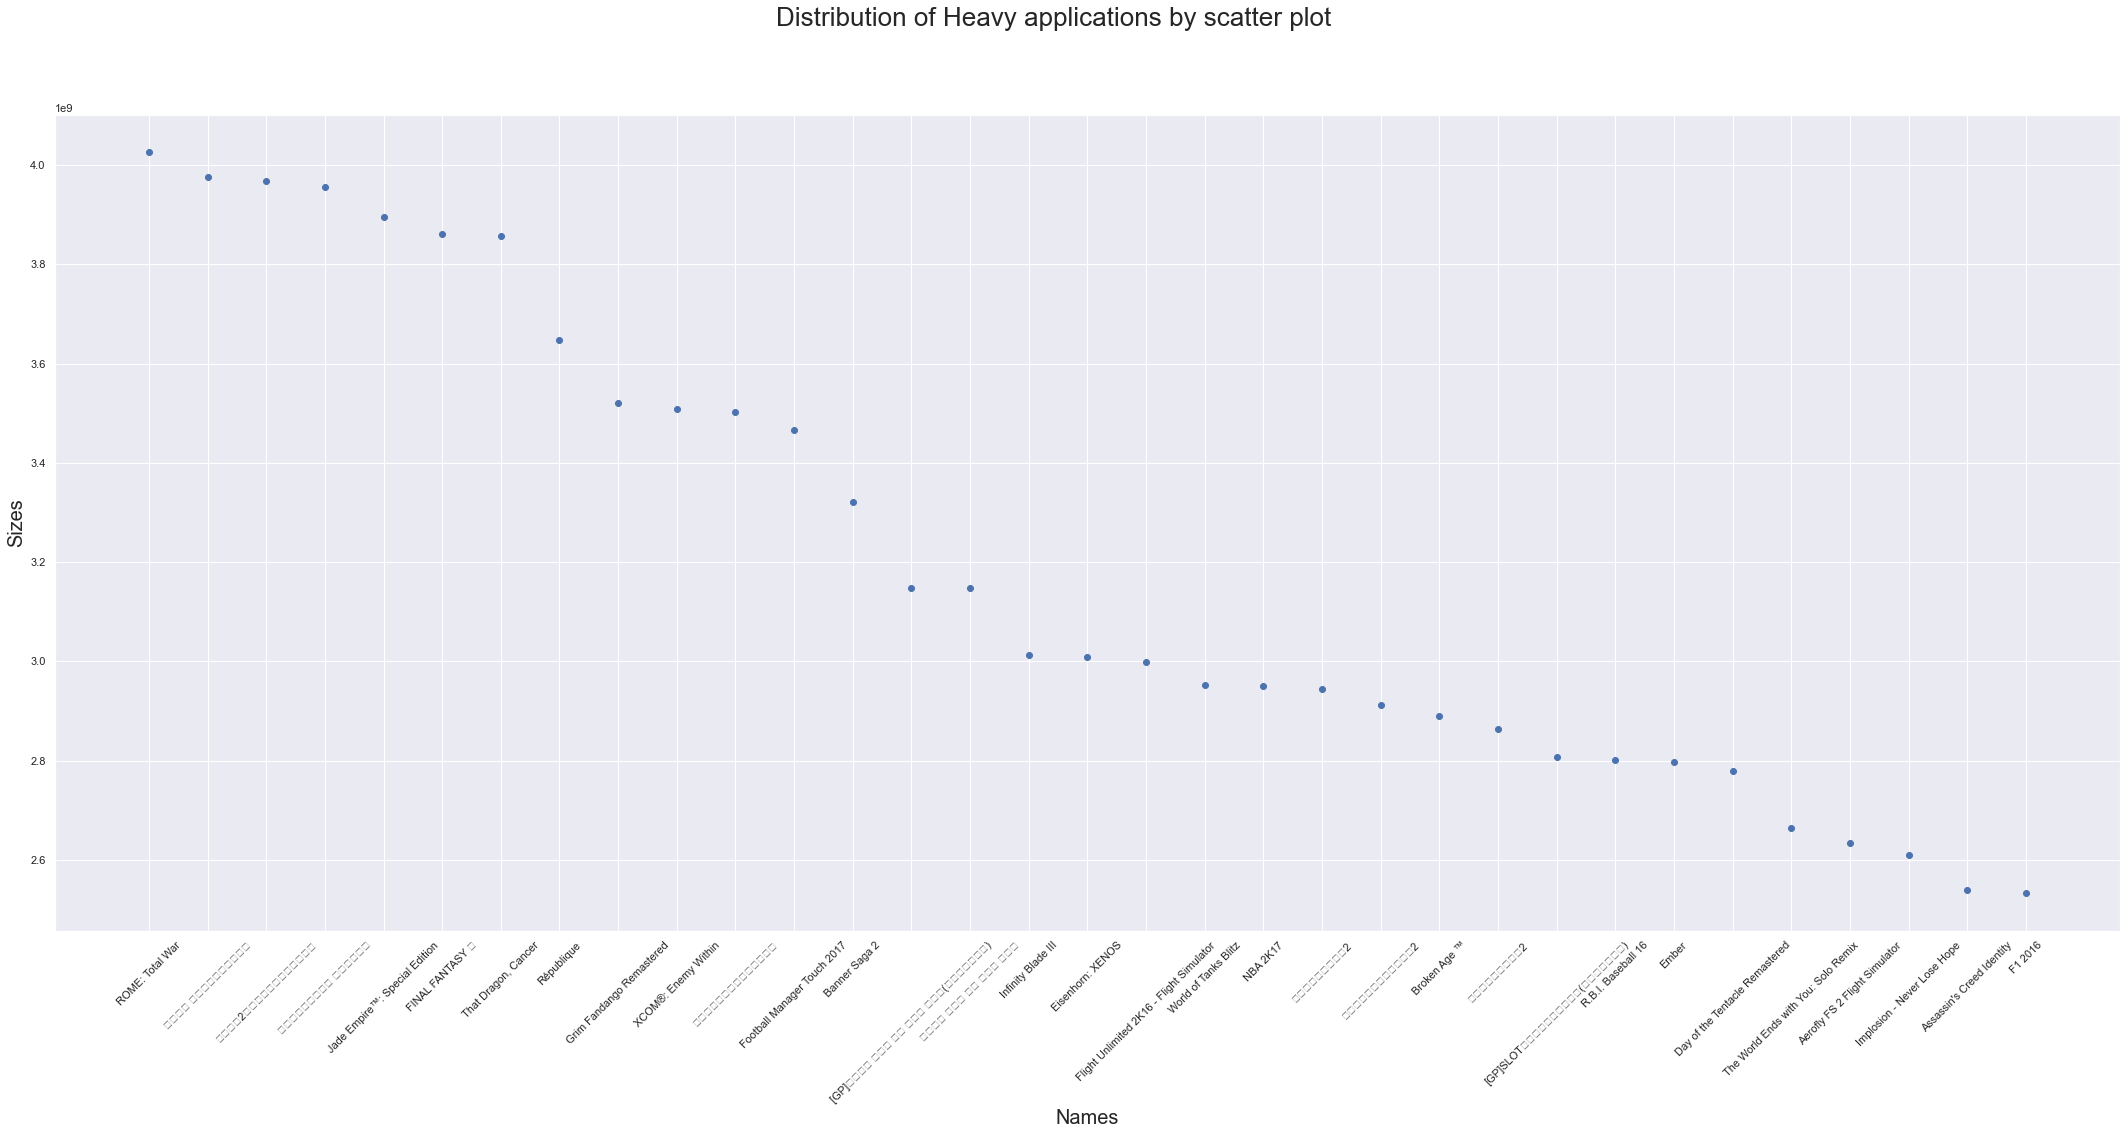

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(37, 15)) #giving the size for figue

names = h["name"];
size = h["size"];

plt.scatter(x=names, y=size) #creating the scatter plot
plt.xticks(rotation=45)
plt.suptitle('Distribution of Heavy applications by scatter plot', size=26)
plt.xlabel("Names", size=20)
plt.ylabel("Sizes", size=20)

plt.show()

Now we can see the illustration of heavy applications by using scatter plot. But we can not see names in the graph properly because of they are written in hieroglyphs, and we can read names in the table above.

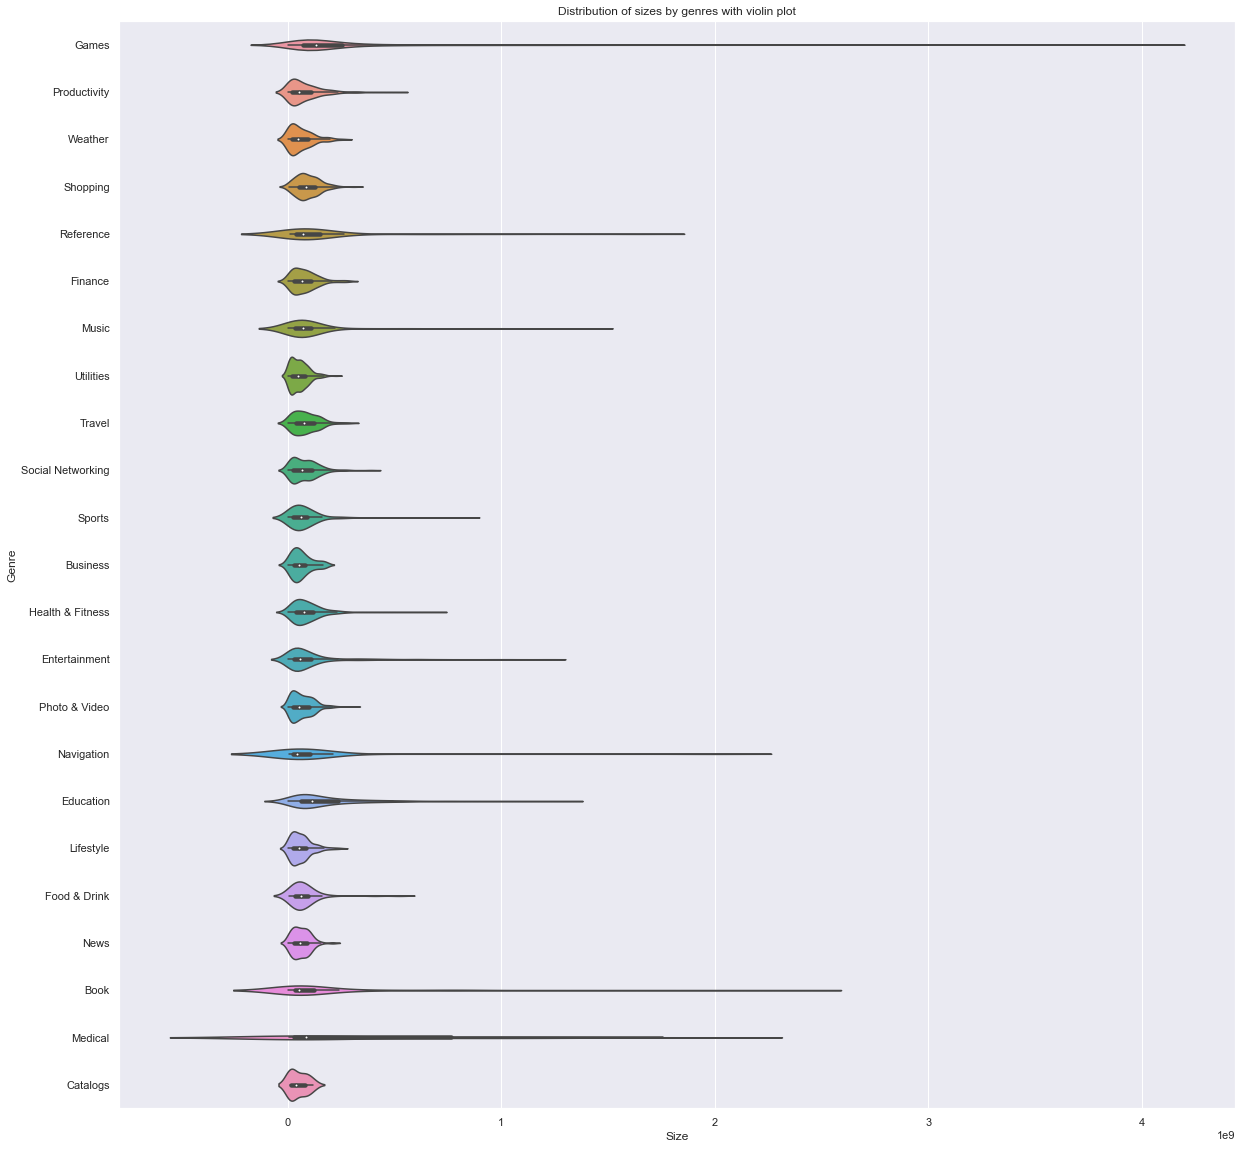

In [47]:
sns.set(rc={'figure.figsize':(20,20)}) #giving the size for figue

ax = sns.violinplot(data=as_file2, #creating the violin plot
            x="size", y="genre"
           ).set(title='Distribution of sizes by genres with violin plot', xlabel="Size", ylabel="Genre")

The violin plot illustrates that the size of many applications is around 0 and 0.3 * 10^9 bytes.